## Step 1: Read the .CSV file into a dataframe

In [1]:
import pandas as pd
df = pd.read_csv('ETL_DATA_new.csv')
df.head()

TimeStamp  Point(139.0794379 36.3727776)   
0  0  2018-01-01 01:00:00                            NaN  \
1  1  2018-01-01 02:00:00                            NaN   
2  2  2018-01-01 03:00:00                            NaN   
3  3  2018-01-01 04:00:00                            NaN   
4  4  2018-01-01 05:00:00                            NaN   

   Point(139.1051411 36.3963822)  Point(139.0960211 36.4047323)   
0                            NaN                            5.0  \
1                            NaN                           11.0   
2                            NaN                            7.0   
3                            NaN                            5.0   
4                            NaN                            6.0   

   Point(139.0428727 36.3816035)  Point(138.9955116 36.33801589999999)   
0                           13.0                                  18.0  \
1                           12.0                                  22.0   
2                           12.0                                  19.0   
3                           11.0                                  16.0   
4                           11.0                                  10.0   

   Point(139.342672 36.4105658)  Point(139.3526243 36.3695416)   
0                          20.0                            NaN  \
1                          15.0                            NaN   
2                          16.0                            NaN   
3                          11.0                            NaN   
4                           8.0                            NaN   

   Point(139.1945766 36.31351160000001)  ...  Point(139.9418164 36.7656467)   
0                                   NaN  ...                            NaN  \
1                                   NaN  ...                            NaN   
2                                   NaN  ...                            NaN   
3                                   NaN  ...                            NaN   
4                                   NaN  ...                            NaN   

   Point(140.0549894 36.9688923)  Point(139.8775674 36.3847082)   
0                            NaN                            NaN  \
1                            6.0                            NaN   
2                            0.0                            NaN   
3                            2.0                            NaN   
4                            4.0                            NaN   

   Point(139.9101767 36.4393022)  Point(139.9074816 36.4445767)   
0                            NaN                            NaN  \
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   Point(140.0934838 36.4673588)  Point(139.7422865 36.2305774)   
0                            6.0                            NaN  \
1                            9.0                            NaN   
2                           10.0                            NaN   
3                           11.0                            NaN   
4                            8.0                            NaN   

   Point(139.7151723 36.822353)  Point(140.1510903 36.6598314)  Unnamed: 1832  
0                           NaN                            4.0            NaN  
1                           NaN                            5.0            NaN  
2                           NaN                            6.0            NaN  
3                           NaN                           11.0            NaN  
4                           NaN                            6.0            NaN  

[5 rows x 1833 columns]

## Step 2: Fill the NaN values and drop the "TimeStamp" column

In [2]:
df = df.fillna(0)
df = df.drop(['TimeStamp'], axis=1)
df.head()

Point(139.0794379 36.3727776)  Point(139.1051411 36.3963822)   
0  0                            0.0                            0.0  \
1  1                            0.0                            0.0   
2  2                            0.0                            0.0   
3  3                            0.0                            0.0   
4  4                            0.0                            0.0   

   Point(139.0960211 36.4047323)  Point(139.0428727 36.3816035)   
0                            5.0                           13.0  \
1                           11.0                           12.0   
2                            7.0                           12.0   
3                            5.0                           11.0   
4                            6.0                           11.0   

   Point(138.9955116 36.33801589999999)  Point(139.342672 36.4105658)   
0                                  18.0                          20.0  \
1                                  22.0                          15.0   
2                                  19.0                          16.0   
3                                  16.0                          11.0   
4                                  10.0                           8.0   

   Point(139.3526243 36.3695416)  Point(139.1945766 36.31351160000001)   
0                            0.0                                   0.0  \
1                            0.0                                   0.0   
2                            0.0                                   0.0   
3                            0.0                                   0.0   
4                            0.0                                   0.0   

   Point(139.2076974 36.3034767)  ...  Point(139.9418164 36.7656467)   
0                            0.0  ...                            0.0  \
1                            0.0  ...                            0.0   
2                            0.0  ...                            0.0   
3                            0.0  ...                            0.0   
4                            0.0  ...                            0.0   

   Point(140.0549894 36.9688923)  Point(139.8775674 36.3847082)   
0                            0.0                            0.0  \
1                            6.0                            0.0   
2                            0.0                            0.0   
3                            2.0                            0.0   
4                            4.0                            0.0   

   Point(139.9101767 36.4393022)  Point(139.9074816 36.4445767)   
0                            0.0                            0.0  \
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   Point(140.0934838 36.4673588)  Point(139.7422865 36.2305774)   
0                            6.0                            0.0  \
1                            9.0                            0.0   
2                           10.0                            0.0   
3                           11.0                            0.0   
4                            8.0                            0.0   

   Point(139.7151723 36.822353)  Point(140.1510903 36.6598314)  Unnamed: 1832  
0                           0.0                            4.0            0.0  
1                           0.0                            5.0            0.0  
2                           0.0                            6.0            0.0  
3                           0.0                           11.0            0.0  
4                           0.0                            6.0            0.0  

[5 rows x 1832 columns]

## Step 3: Create a dataframe of longitude and latitude and pm25 >= 15 of each sensor

In [3]:
pm25 = pd.DataFrame(columns=["long", "lat", "pm25"])
for col in df[2:]:
    res = [i for i in df[col].values if i >= 15]
    if len(res) == 0 or col == "Unnamed":
        df = df.drop([col], axis = 1)
    else:
        if "Poi" in col:
            #print("Hey")
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            pm25 = pm25._append({'long': float(long), 'lat': float(lat), 'pm25': len(res)}, ignore_index=True)
pm25.head()

long        lat     pm25
0  139.096021  36.404732   8204.0
1  139.042873  36.381603   8999.0
2  138.995512  36.338016  13929.0
3  139.342672  36.410566  12667.0
4  139.381732  36.290913  10391.0

## Step 4: Draw the heatmap of above datafarme

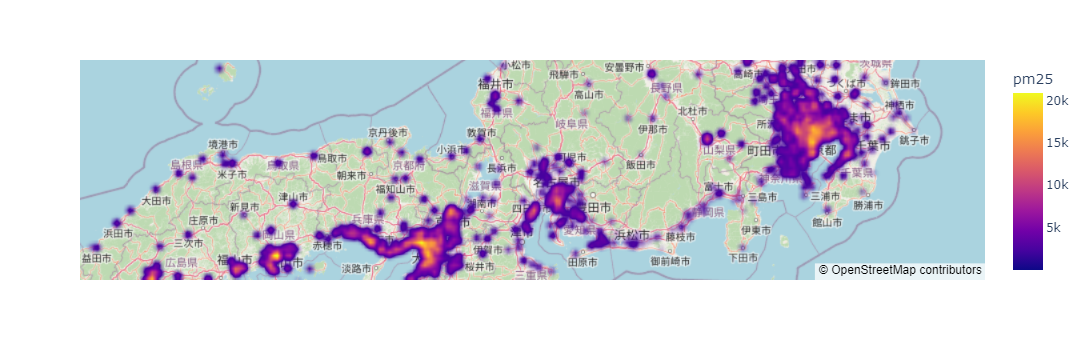

In [4]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(pm25, lat = 'lat', lon = 'long', z = 'pm25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

## Step 5: Create a dataframe of longitude and latitude and maximum PM2.5 value of each sensor

In [5]:
maxPM25 = pd.DataFrame(columns=["long", "lat", "maxPM25"])
for col in df[1:]:
    res = [i for i in df[col].values if i >= 15]
    if len(res) == 0 or col == "Unnamed":
        df = df.drop([col], axis = 1)
    else:
        if "Poi" in col:
            #print("Hey")
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            maxPM25 = maxPM25._append({'long': float(long), 'lat': float(lat), 'maxPM25': max(res)}, ignore_index=True)
maxPM25.head()

long        lat  maxPM25
0  139.096021  36.404732    110.0
1  139.042873  36.381603     77.0
2  138.995512  36.338016    200.0
3  139.342672  36.410566     72.0
4  139.381732  36.290913    200.0

## Step 6: Draw the heatmap of above datafarme

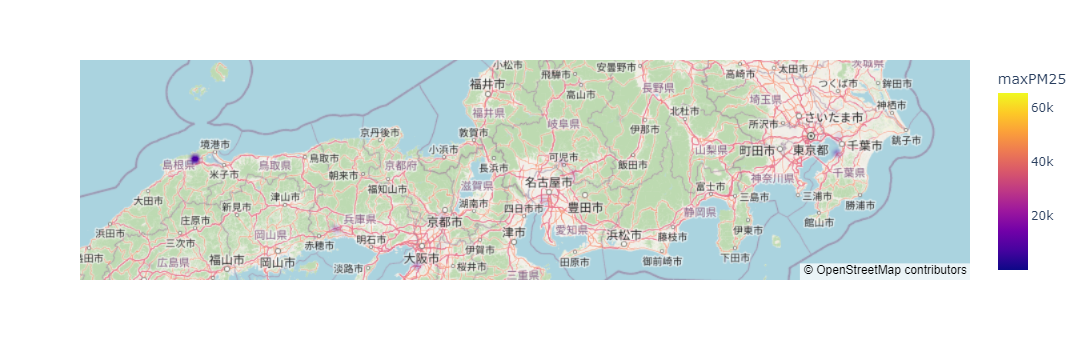

In [6]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(maxPM25, lat = 'lat', lon = 'long', z = 'maxPM25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()